In [1]:
from google.colab import drive

drive.mount('./drive')

Mounted at ./drive


In [2]:
text_path = '/content/drive/MyDrive/Colab Notebooks/Articles_Gerhard Richter/TheGardian_Gerhard Richter.txt'

In [3]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
import os

%matplotlib inline
pd.set_option('display.max.colwidth', 200)

import spacy
from spacy import displacy
from spacy.tokenizer import Tokenizer
from spacy.matcher import Matcher
from spacy.tokens import Span
import squarify
import networkx as nx

In [5]:
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [6]:
text_path2 = '/content/drive/MyDrive/Colab Notebooks/Articles_Gerhard Richter/'
files = os.listdir(text_path2)

temp = []
text = []
for file in files:
    file_path = text_path2 + file
    with open(file_path, 'rt', encoding='UTF8') as textfile:
        for row in textfile:
            temp.append(row.split("."))
    for row in temp:
        text.append(row)

In [7]:
text_list = []

for doc in text:
  for line in doc:
    if line == '\n':
      pass
    elif line == ' ':
      pass
    elif line == '”':
      pass
    elif line == '':
      pass
    elif len(line) < 10:
      pass
    else:
      text_list.append(line)

In [8]:
len(text_list)

7672

In [9]:
df = pd.DataFrame(text_list, columns=['sentence'])
df.head()

sentence
0                                                                                                                                                German artist Gerhard Richter claims to paint photographs
1                       His realist figurative works, called photopaintings, make extensive use of the blurred appearance of photographs that lack focus or show the movement of the camera or its subject
2                                                                                     This blurring is central to understanding the dialogue that Richter enacts between photography and painting as media
3                                                                                                                 It is also his means for arriving at immediate and singular works of art based in affect
4   This visual strategy, though seemingly inarticulate, is able to achieve such effects because of the blurs ability to disrupt traditional representational relations as found in resemblance and im...

In [10]:
len(df)

7672

In [11]:
tokens = []
regex = r"[^a-zA-Z0-9]"
subst = " "

def tokenize(text):
    tokens = re.sub(regex, subst, text)
    tokens = tokens.lower().split()
    return tokens

df['tokens'] = df['sentence'].apply(tokenize)
df.head()

sentence  \
0                                                                                                                                                German artist Gerhard Richter claims to paint photographs   
1                       His realist figurative works, called photopaintings, make extensive use of the blurred appearance of photographs that lack focus or show the movement of the camera or its subject   
2                                                                                     This blurring is central to understanding the dialogue that Richter enacts between photography and painting as media   
3                                                                                                                 It is also his means for arriving at immediate and singular works of art based in affect   
4   This visual strategy, though seemingly inarticulate, is able to achieve such effects because of the blurs ability to disrupt traditional representational relations as found in resemblance and im...   

                                                                                                                                                                                                    tokens  
0                                                                                                                                       [german, artist, gerhard, richter, claims, to, paint, photographs]  
1  [his, realist, figurative, works, called, photopaintings, make, extensive, use, of, the, blurred, appearance, of, photographs, that, lack, focus, or, show, the, movement, of, the, camera, or, its,...  
2                                                                   [this, blurring, is, central, to, understanding, the, dialogue, that, richter, enacts, between, photography, and, painting, as, media]  
3                                                                                               [it, is, also, his, means, for, arriving, at, immediate, and, singular, works, of, art, based, in, affect]  
4  [this, visual, strategy, though, seemingly, inarticulate, is, able, to, achieve, such, effects, because, of, the, blur, s, ability, to, disrupt, traditional, representational, relations, as, found...

In [12]:
STOP_WORDS = nlp.Defaults.stop_words.union(['s','t', 'd', 'ist'])
tokens = []
for line in df['tokens']:

  doc_tokens = []

  for token in line:
      if token not in STOP_WORDS:
        doc_tokens.append(token)
  tokens.append(doc_tokens)

df['tokens'] = tokens

In [13]:
df.head()

sentence  \
0                                                                                                                                                German artist Gerhard Richter claims to paint photographs   
1                       His realist figurative works, called photopaintings, make extensive use of the blurred appearance of photographs that lack focus or show the movement of the camera or its subject   
2                                                                                     This blurring is central to understanding the dialogue that Richter enacts between photography and painting as media   
3                                                                                                                 It is also his means for arriving at immediate and singular works of art based in affect   
4   This visual strategy, though seemingly inarticulate, is able to achieve such effects because of the blurs ability to disrupt traditional representational relations as found in resemblance and im...   

                                                                                                                                                                 tokens  
0                                                                                                        [german, artist, gerhard, richter, claims, paint, photographs]  
1                        [realist, figurative, works, called, photopaintings, extensive, use, blurred, appearance, photographs, lack, focus, movement, camera, subject]  
2                                                                           [blurring, central, understanding, dialogue, richter, enacts, photography, painting, media]  
3                                                                                                     [means, arriving, immediate, singular, works, art, based, affect]  
4  [visual, strategy, seemingly, inarticulate, able, achieve, effects, blur, ability, disrupt, traditional, representational, relations, found, resemblance, imitation]

In [14]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [15]:
n = WordNetLemmatizer()

tokens = []
for line in df['tokens']:
    lemmas = []
    for token in line:
      lemma = n.lemmatize(token)
      lemmas.append(lemma)
    tokens.append(lemmas)

df['tokens'] = tokens

In [16]:
df.head()

sentence  \
0                                                                                                                                                German artist Gerhard Richter claims to paint photographs   
1                       His realist figurative works, called photopaintings, make extensive use of the blurred appearance of photographs that lack focus or show the movement of the camera or its subject   
2                                                                                     This blurring is central to understanding the dialogue that Richter enacts between photography and painting as media   
3                                                                                                                 It is also his means for arriving at immediate and singular works of art based in affect   
4   This visual strategy, though seemingly inarticulate, is able to achieve such effects because of the blurs ability to disrupt traditional representational relations as found in resemblance and im...   

                                                                                                                                                               tokens  
0                                                                                                        [german, artist, gerhard, richter, claim, paint, photograph]  
1                        [realist, figurative, work, called, photopaintings, extensive, use, blurred, appearance, photograph, lack, focus, movement, camera, subject]  
2                                                                        [blurring, central, understanding, dialogue, richter, enacts, photography, painting, medium]  
3                                                                                                     [mean, arriving, immediate, singular, work, art, based, affect]  
4  [visual, strategy, seemingly, inarticulate, able, achieve, effect, blur, ability, disrupt, traditional, representational, relation, found, resemblance, imitation]

In [17]:
df_token = df[['tokens']]

In [18]:
from collections import Counter

def word_count(docs):
    
    # 단어의 개수
    word_counts = Counter()

    # 단어가 존재하는 빈도
    word_in_docs = Counter()

    # 전체 문서의 개수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))
    
    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False).astype(int)
    total = wc['count'].sum()
    wc['percent'] = wc['count'].apply(lambda x: x/total)

    wc = wc.sort_values(by='rank')

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # word_in_docs_percent 열에는 전체 문서 중 해당 단어가 존재하는 문서의 비율을 저장합니다.
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

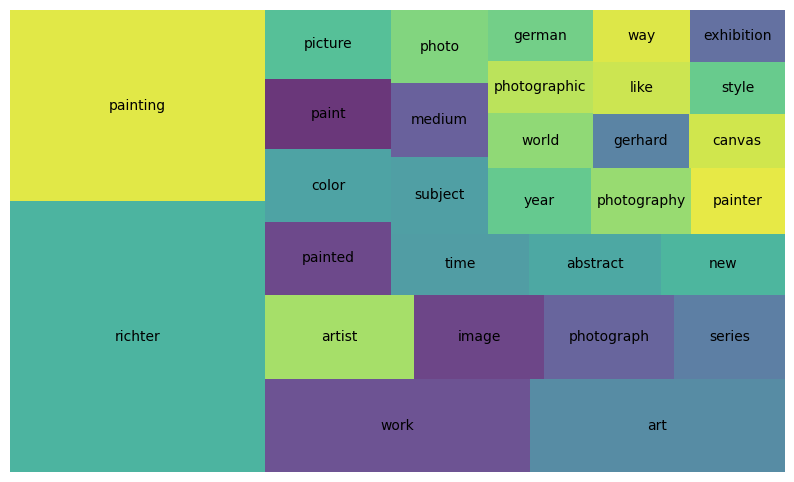

In [19]:
wc = word_count(df_token['tokens'])

wc_top30 = wc[wc['rank'] <= 30]

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
squarify.plot(sizes=wc_top30['percent'], label=wc_top30['word'], alpha=0.8)
# plt.figure(figsize=(20,20))
plt.axis('off')

plt.show()

Knowledge Graph 그리기

In [20]:
df_graph = df[['sentence']]

In [21]:
for i, line in enumerate(df_graph['sentence']):
    line = line.lower()
    df_graph.loc[i, 'sentence'] = line

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [22]:
df_graph.head()

sentence
0                                                                                                                                                german artist gerhard richter claims to paint photographs
1                       his realist figurative works, called photopaintings, make extensive use of the blurred appearance of photographs that lack focus or show the movement of the camera or its subject
2                                                                                     this blurring is central to understanding the dialogue that richter enacts between photography and painting as media
3                                                                                                                 it is also his means for arriving at immediate and singular works of art based in affect
4   this visual strategy, though seemingly inarticulate, is able to achieve such effects because of the blurs ability to disrupt traditional representational relations as found in resemblance and im...

In [23]:
tokens = []
regex = r"[^a-z0-9]"
subst = " "

def remove_text(text):
    tokens = re.sub(regex, subst, text)
    return tokens

df_graph['sentence'] = df_graph['sentence'].apply(remove_text)
df_graph.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


sentence
0                                                                                                                                                german artist gerhard richter claims to paint photographs
1                       his realist figurative works  called photopaintings  make extensive use of the blurred appearance of photographs that lack focus or show the movement of the camera or its subject
2                                                                                     this blurring is central to understanding the dialogue that richter enacts between photography and painting as media
3                                                                                                                 it is also his means for arriving at immediate and singular works of art based in affect
4   this visual strategy  though seemingly inarticulate  is able to achieve such effects because of the blur s ability to disrupt traditional representational relations as found in resemblance and im...

In [24]:
df_graph.head()

sentence
0                                                                                                                                                german artist gerhard richter claims to paint photographs
1                       his realist figurative works  called photopaintings  make extensive use of the blurred appearance of photographs that lack focus or show the movement of the camera or its subject
2                                                                                     this blurring is central to understanding the dialogue that richter enacts between photography and painting as media
3                                                                                                                 it is also his means for arriving at immediate and singular works of art based in affect
4   this visual strategy  though seemingly inarticulate  is able to achieve such effects because of the blur s ability to disrupt traditional representational relations as found in resemblance and im...

In [25]:
# 불용어
STOP_WORDS2 =['s','t', 'd', 'ist', '', 'a', 'the', 'an', 're']
stops = []

for line in df_graph['sentence']:

  doc_tokens = ""
  tokens = line.split()

  for token in tokens:
      if token not in STOP_WORDS2:
        doc_tokens += token + ' '
  stops.append(doc_tokens)

df_graph['sentence'] = stops

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [26]:
df_graph.head()

sentence
0                                                                                                                                           german artist gerhard richter claims to paint photographs 
1                                his realist figurative works called photopaintings make extensive use of blurred appearance of photographs that lack focus or show movement of camera or its subject 
2                                                                                    this blurring is central to understanding dialogue that richter enacts between photography and painting as media 
3                                                                                                            it is also his means for arriving at immediate and singular works of art based in affect 
4  this visual strategy though seemingly inarticulate is able to achieve such effects because of blur ability to disrupt traditional representational relations as found in resemblance and imitation

In [27]:
# 표제어
n = WordNetLemmatizer()

temp_lemma = []

for line in df_graph['sentence']:
    lemmas = ""
    tokens = line.split()
    
    for token in tokens:
      lemma = n.lemmatize(token)
      lemmas += lemma + ' '
    temp_lemma.append(lemmas)

df_graph['sentence'] = temp_lemma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [28]:
df_graph.head()

sentence
0                                                                                                                                          german artist gerhard richter claim to paint photograph 
1                                his realist figurative work called photopaintings make extensive use of blurred appearance of photograph that lack focus or show movement of camera or it subject 
2                                                                                 this blurring is central to understanding dialogue that richter enacts between photography and painting a medium 
3                                                                                                           it is also his mean for arriving at immediate and singular work of art based in affect 
4  this visual strategy though seemingly inarticulate is able to achieve such effect because of blur ability to disrupt traditional representational relation a found in resemblance and imitation

In [29]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""
  
  for tok in nlp(sent):
    ## chunk 2. ///  if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [30]:
entity_pairs = []

for i in tqdm(df_graph['sentence']):
    entity_pairs.append(get_entities(i))

100%|██████████| 7672/7672 [00:48<00:00, 159.70it/s]


In [31]:
entity_pairs[0:10]

[['', 'german gerhard richter photograph'],
 ['lack', 'camera'],
 ['blurring', 'richter medium'],
 ['it', 'immediate  affect'],
 ['visual  strategy', 'representational blur resemblance'],
 ['result richter work', 'mimetic  schema'],
 ['what', 'only felt sensation'],
 ['george didi huberman', 'resemblance'],
 ['blur', 'spontaneous  a'],
 ['most  he', 'punctum']]

In [32]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern], on_match=None) 

  matches = matcher(doc)

  if len(matches) != 0:
      k = len(matches) - 1
      span = span = doc[matches[k][1]:matches[k][2]] 
  else:
      return None

  return(span.text)

In [33]:
relations = [get_relation(i) for i in tqdm(df_graph['sentence'])]

100%|██████████| 7672/7672 [00:49<00:00, 154.93it/s]


In [34]:
relations[0:10]

['claim',
 'make extensive',
 'is central',
 'is',
 'is able',
 'exceeds',
 'show',
 'describes',
 'make most',
 'identifies']

In [35]:
pd.Series(relations).value_counts()[:50]

is              355
began           155
made            122
are             120
wa               89
had              81
in               76
richter          70
painted          64
want             45
were             42
have             42
worked           42
found            41
wanted           40
left             39
argue            37
try              36
recall           36
used             36
understood       35
took             34
show             33
it               31
seen             31
set              29
painting         28
sold             28
considers        27
taken            27
work             26
started          25
described        25
moved            24
commissioned     23
put              23
is able          22
argues           22
discussed        22
said             22
continued        21
from             21
produced         21
million at       21
born             21
like             20
been             20
commented        19
sold at          19
became           19


In [36]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [37]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

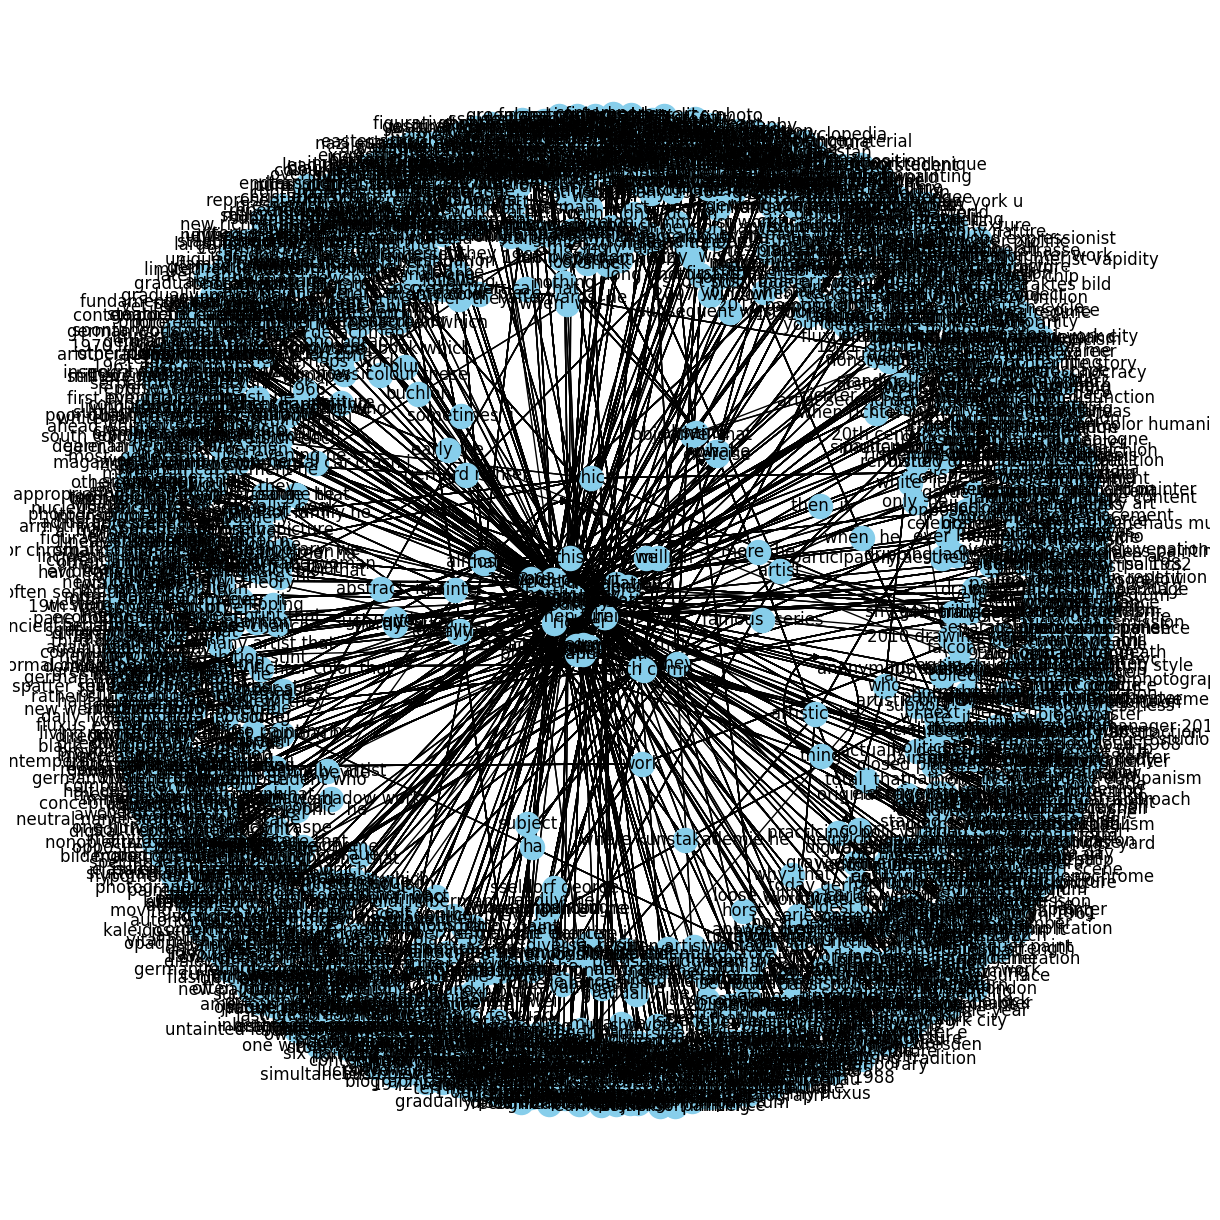

In [38]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

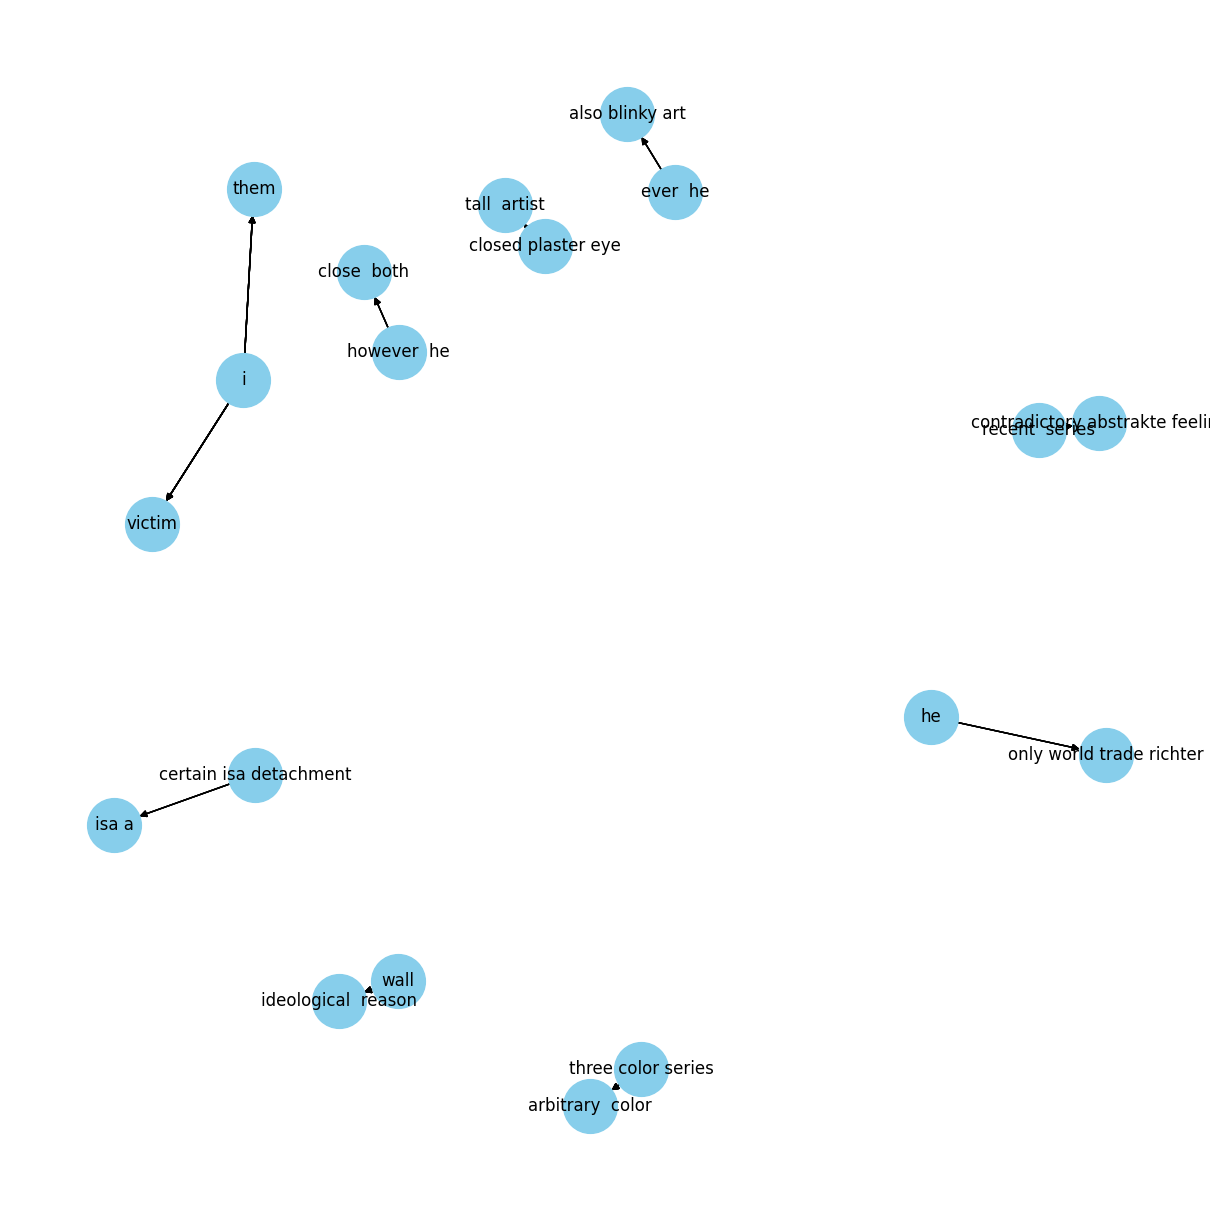

In [39]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="painted"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

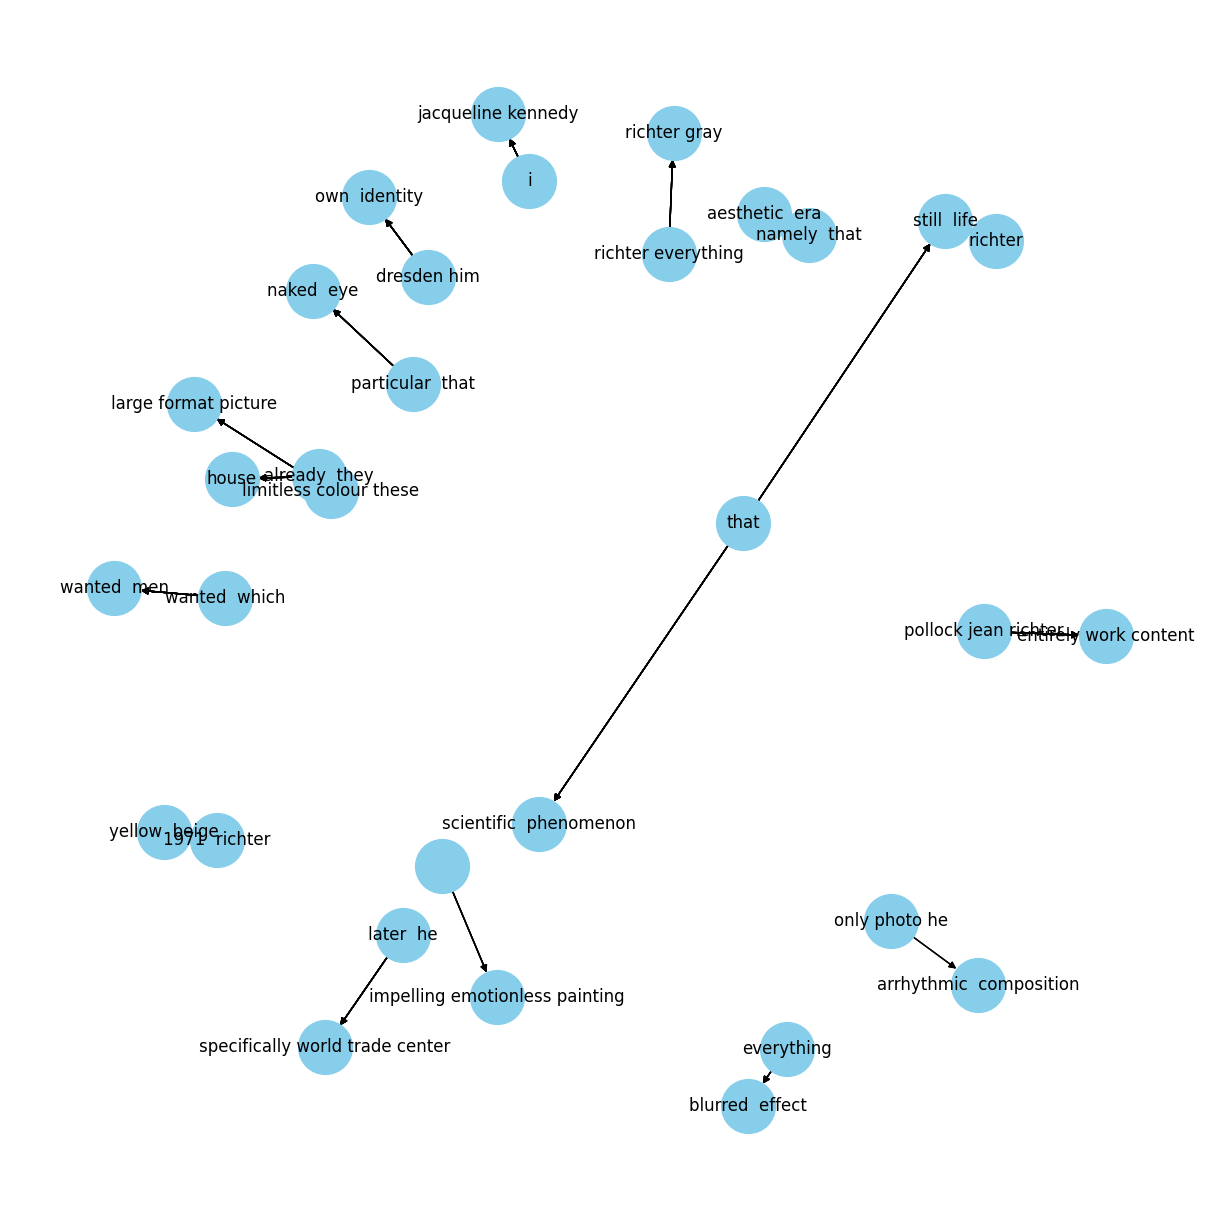

In [47]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="made"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

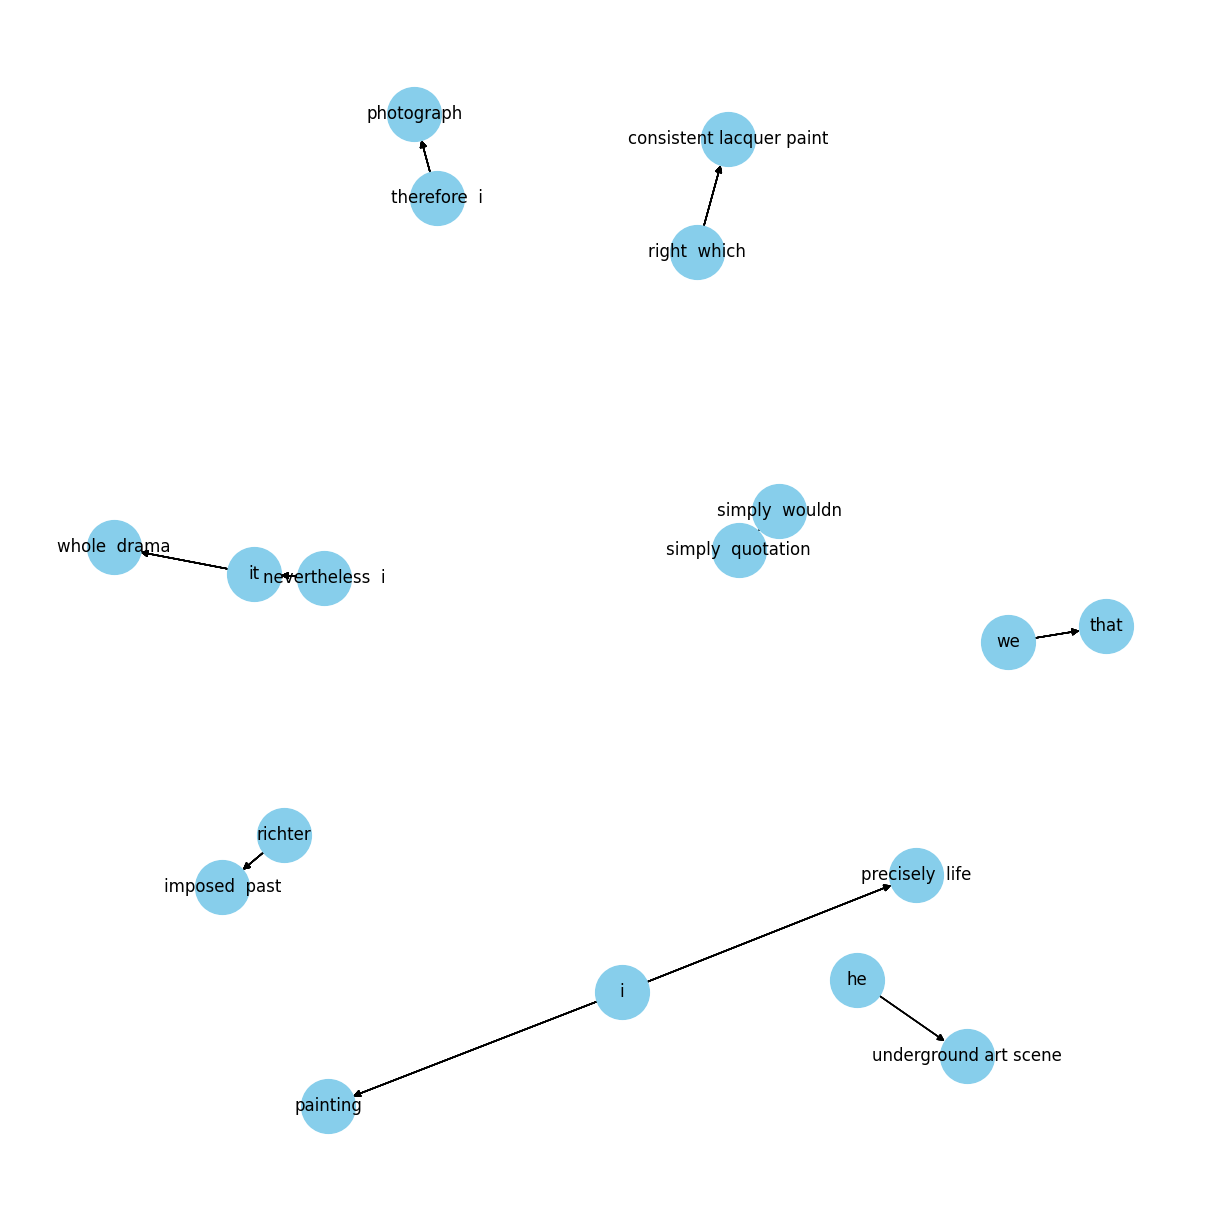

In [40]:
G=nx.from_pandas_edgelist(kg_df[(kg_df['edge']=="wanted") | (kg_df['edge']=="want")], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [41]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="is"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [42]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="are"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

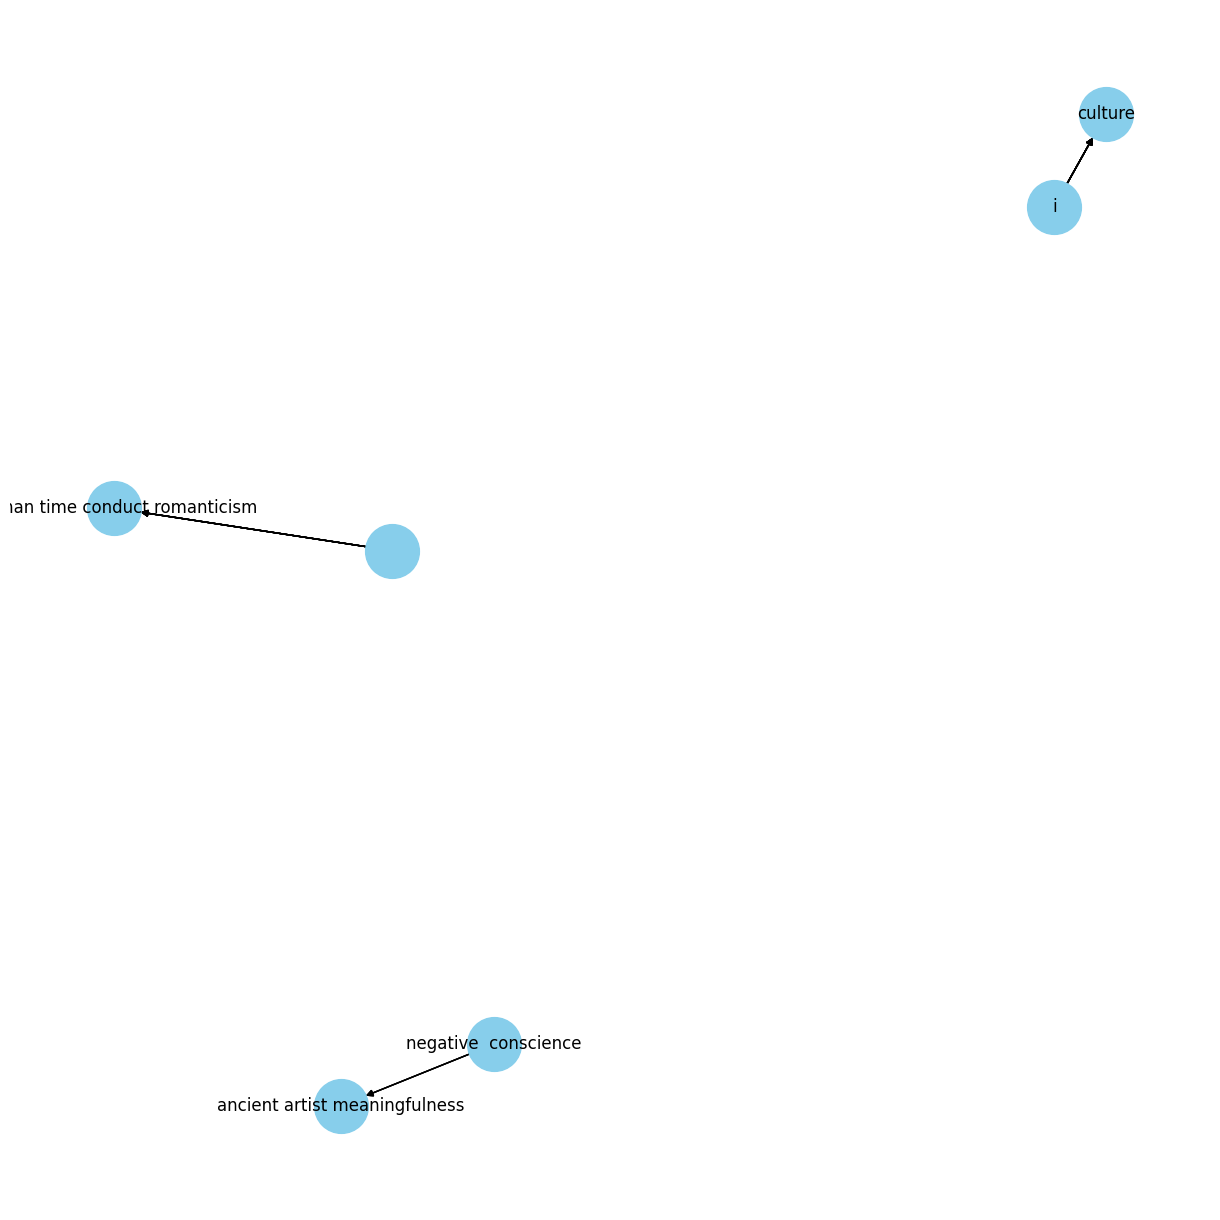

In [57]:
G=nx.from_pandas_edgelist(kg_df[(kg_df['edge']=="like")], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

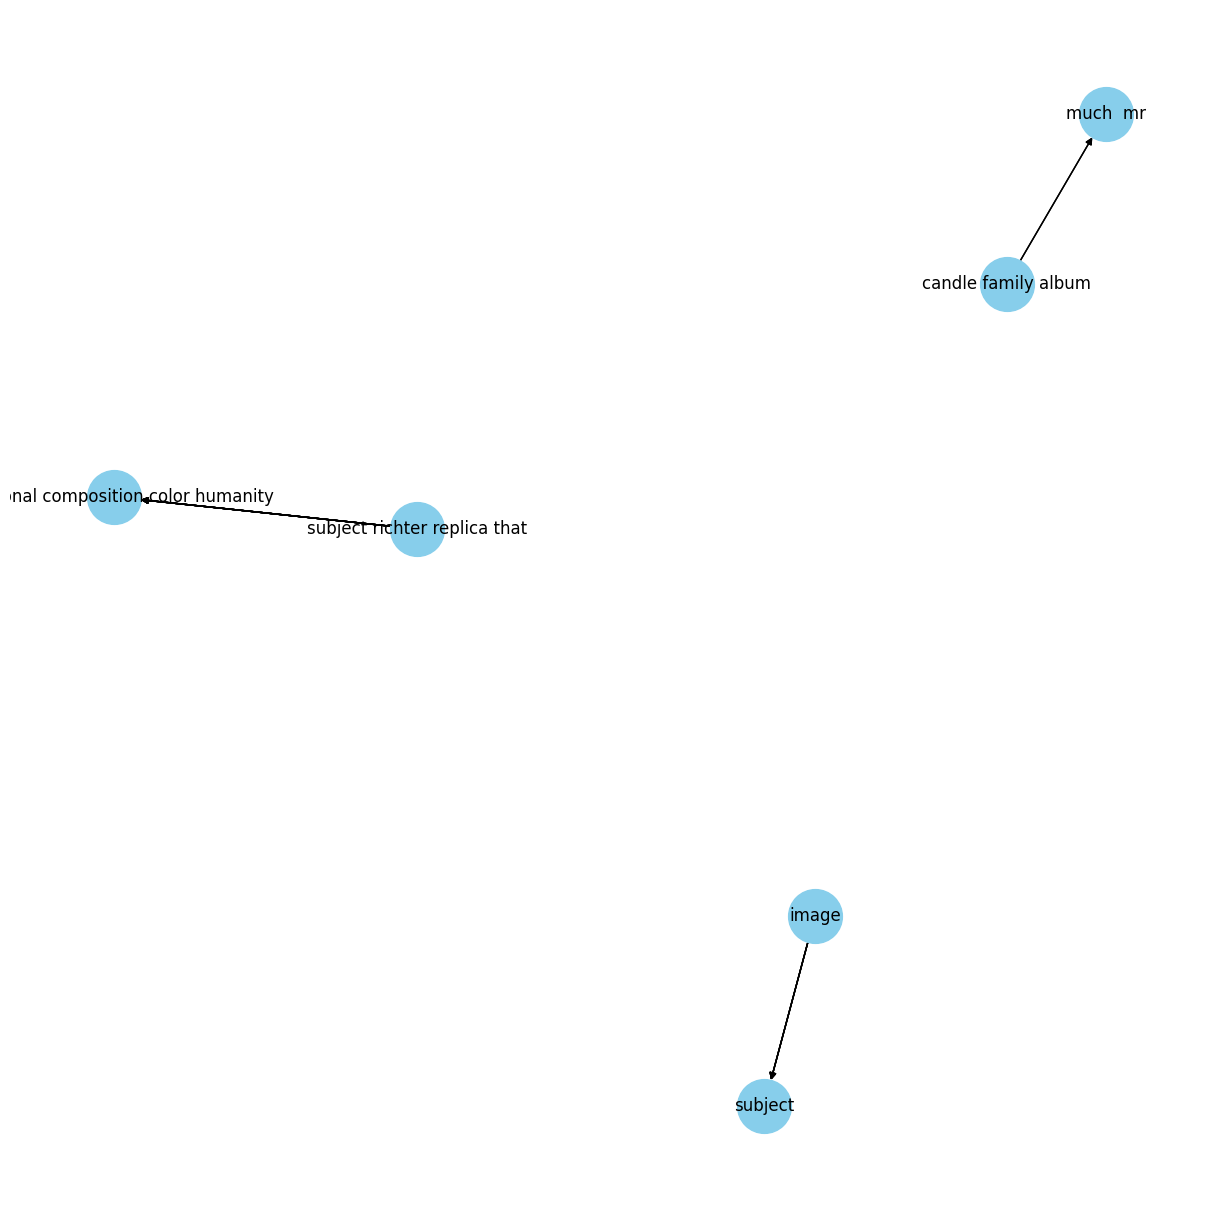

In [44]:
G=nx.from_pandas_edgelist(kg_df[(kg_df['edge']=="blurred")], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()